# GRC 海報展示補充資料 | 程式碼 DEMO

作者：陳乃禾 (Naiho Chen)

#### 講義重點

- 首先展示兩個主程式：`Signal detector in ROI.py` 以及 `MS_data_plotter.py`
- 分別展示組成此二主程式的各功能元件

再龐大的程式都是由很多小部件所組成的，每一個小小的功能都很重要，儘管它所實現的再簡單都不外如是。這件事在自己著手寫程式解決問題的過程中會有更直接的感受；當然也可能是因為付出了時間去熟悉，我才會有這種想法，希望自己所做的一切是有意義的😆

不論如何，我將展示自己在設計主程式，並解決主要問題的過程中所構思的一些小元件。想了很多的功能，有一些功能元件最後並沒有被添加至最終程式中，都一併把它們放在這個地方展示。那些沒被放進主程式的小元件不一定是什麼失敗的糟糕東西，有些是我基於使用情境、執行效率，或是我花費在專案上的時間等等考量所作出的決定。也就是說，也許加入這些小功能反而能讓我的主程式泛用性更高、更全面，只是我必須為此花費更多時間去規劃程式的流程控制；而目前的使用情境讓我覺得沒有這個必要。

這份 DEMO 講義中的程式碼有經過我重新梳理過，尤其是各段落的說明，希望各位喜歡。

## 主程式：signal_detector_in_roi.py

一般而言，MALDI-TOF-MS 的質譜訊號圖大概會是「橫軸：時間 (或 m/z)」、「縱軸：訊號強度」的形式；在這樣的平面所接收到的原始訊號會形成一個連續的波形圖，而這個波形是由「真實訊號 (signal)」以及「雜訊 (noise)」所組成的；而這個「雜訊」通常會被稱作 baseline。

不過請注意，所謂的「雜訊」在這個使用情境下有兩個層次——除了上述以外，因為這支程式是針對「影像」這種資料格式做處理，因此所謂「雜訊」又有另一層意義或曰來源，即「非訊號的像素點」。最直接的可以往下滑到 Canny edge detection 一節，就可以有最直接的體會。

這支程式所要達成的目標，即透過影像處理，找出指定區域中可能的真實訊號；換句話說，分辨出雜訊中可能存在的訊號。不只是從整張圖片中找出原始信號的像素位置，還要找出哪些部分是 baseline 以外的「訊號」。先透過顏色濾鏡找到原始訊號所在的像素點，再透過使用者手動選取 ROI 來切割訊號以及雜訊。

此程式的輸入和輸出皆為一張圖片；輸出的圖片上標有使用者所選取的 ROI 以及在 ROI 中過濾出來的訊號波。

In [2]:
# 由此執行 signal_detector_in_roi.py
! python signal_detector_in_roi.py

^C


### 模組一：selecting_roi_frame.py

這是我第一次把寫 python 模組，以為一定要把函式裝進類別中。因此這個模組被我寫的過於複雜了，不太容易閱讀。當然我在下一次嘗試 (`color_filter.py`) 就改掉了這個問題。(將此模組匯入使用的範例在 1-5)

In [8]:
! python selecting_roi_frame.py

Start from: (339, 99)
End at: (472, 450)
Height × Width: 351 × 133
[[[339, 99], [472, 450]]]
Start from: (534, 455)
End at: (740, 314)
Height × Width: 141 × 206
[[[339, 99], [472, 450]], [[534, 455], [740, 314]]]


### 模組二：color_filter.py

這一個模組是參考網路上的範例並修改而成的；也斬去了上一個模組中硬要把函式裝進類別裡的奇特執著😌

In [9]:
! python color_filter.py

## 主程式：simple_MS_data_plotter.py

這個程式可以通俗的理解成一個資料視覺化的程式。它可以把質譜儀產生的原始資料畫成圖表，讓使用者非常容易就能夠辨識出突出的訊號在哪裡。

讀取 TOF-MS 原始資料後繪圖；共有「三個滑桿」，以及隨滑桿調整而變動的「三個圖表」。

- 滑桿分別控制：
    1. 時間錨 (time anchor)
    2. 縮放 (zoom)
    3. 訊雜比 (signal ratio)
- 圖表分別為：
    1. 無標註的原始圖 (使用 `plt.plot()`)
    2. 只包含訊號的無標註圖 (使用 `plt.bar()`)
    3. 標記了雜混基線、區間，以及訊號範圍的圖

雖然它只是一個簡單的作圖程式，我也是替它煩惱了好一陣子🧐

其中一個主要的原因是電腦「效能」問題，因為我主要是用筆電來撰寫、測試程式。因此一種可能發生的情況是，儘管我寫的程式沒有任何 BUG，但是同時消耗太多硬體資源了，電腦就當機了...  這個問題就發生在我一開始計劃要一次顯示出隨滑桿調整三種圖表，因為我覺得這樣的程式界面一定會相當酷炫！就像可以調整一個儀表板一般。

不過既然我都這樣說了，想當然爾雖然我完成了程式，卻是一支跑不動的程式 (所以才會有 MS_data_plotter.py 這支程式)。當然我有用實驗室效能較好的桌機測試，雖然有點卡頓，但還是能正常執行的；不過對我來說，提升電腦效能硬幹這個程式並不實際，沒有實用價值。

於是我尋思，既然一次跑三個圖跑不出來，那我就一次只畫一張圖。但是我不想要將程式分成三個分離、單獨執行的部分，除了個人覺得這樣失去了一個整體感之外，也有一點使用方便性的考量；我不希望使用者在畫圖之前還要先決定好要畫哪一張圖——這是一種「探索性資料分析 (EDA)」的想法，雖然沒人明確規定，但我認為，從純數值紀錄的原始資料到視覺化呈現的過程必須要讓資料分析者盡可能多試試不同的參數、圖表類型。這樣來回調適是一個連續的假設與驗證的過程，資料分析者會在者個過程中發現隱藏在撲朔迷離的原始資料中的意義，並漸漸產生自己對資料的洞見。如果到時候還要跳出去執行另一個程式才能畫另一張圖，這個寶貴的探索過程就被打斷了。

為了這樣的理想，我設計了幾個「按鈕」來控制何時該執行某部份的程式。因為同時執行的程式被切成幾個部分了，整個程式即便是在我的筆電上也能執行了，因此我將它命名為 simple_MS_data_plotter.py。當然，新增加了這些按鈕，也就表示我必須在流程控制方面多下一點功夫，這部分也花了我好些時間。畢竟之前沒經驗，我覺得有些地方我也還沒有完全明白，不過至少預想的基本功能都實現了。印象深刻的是在設計 "annotation" 這個按鈕「按第二下時取消先前的註解」的時候，突然不知道該怎麼做！天那，就是把它刪掉而已，噢當然再按一下還要能夠再繼續顯示喔哈哈😆

每每我覺得自己的邏輯沒有問題了，程式總不會如我想像般順利執行。不過呢，反正最後總算是成功了，就恭喜我吧 ^^

In [4]:
# 由此執行 MS_signal_detector.py
# 它似乎不能在我本地的 jupyter notebook 中執行
# 只能在終端機中直接執行此腳本
# 不過我不確定 google colab 是否可以執行
# 因此我還是將其放在這裡
# 只是提醒大家若發現無法執行，那可能是因為這個原因
! python simple_MS_data_plotter.py

Figure(640x480)
Figure(640x480)


Figure(1000x800)


Traceback (most recent call last):
  File "c:\Users\star0\Desktop\POSTER_DEMO\MS_data_plotter.py", line 144, in <module>
    main()
  File "c:\Users\star0\Desktop\POSTER_DEMO\MS_data_plotter.py", line 138, in main
    plt.savefig(output_dir + file.split("/")[-1].replace(".data", ".png"))
  File "c:\Users\star0\miniconda3\envs\general\Lib\site-packages\matplotlib\pyplot.py", line 1228, in savefig
    res = fig.savefig(*args, **kwargs)  # type: ignore[func-returns-value]
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\star0\miniconda3\envs\general\Lib\site-packages\matplotlib\figure.py", line 3395, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "c:\Users\star0\miniconda3\envs\general\Lib\site-packages\matplotlib\backend_bases.py", line 2204, in print_figure
    result = print_method(
             ^^^^^^^^^^^^^
  File "c:\Users\star0\miniconda3\envs\general\Lib\site-packages\matplotlib\backend_bases.py", line 2054, in <lambda>
    print_method = functools.wraps(me

## `signal_detector_in_roi.py` 的其他相關元件

### 1-1 OpenCV 讀取檔案的基礎語法

In [ ]:
# image read by cv2

import cv2 as cv

img = cv.imread(
    "./images/392_20k_19.14_660ns_33.205-33.255_0.png", 
    cv.IMREAD_UNCHANGED
    )

cv.imshow("Display window", img)
k = cv.waitKey(0) # Wait for a keystroke in the window
cv.destroyAllWindows()

### 1-2 顏色選取器

原本的想法是，為了因應圖表的多元性，不同的圖表來源標示訊號的顏色可能不同。對使用者來說，「所見即所得」應該是最方便、直覺的。因此我希望透過這個顏色選取器讓使用者直接選取他們所認為的訊號顏色，接著程式就會依據使用者所選取得像素點顏色，製作出過濾掉其他顏色的影像濾鏡，進而篩選出使用者所認為的「訊號」像素點。

後來這個功能沒有被我加入最終程式的原因是，實驗室告訴我他寫的繪圖程式所輸出的圖表格式都相同；因此我認為既然暫時不會遇到需要應付不同圖表樣式的狀況，那麼我只要找到一組最佳的參數來篩選出訊號圖形，並將其設為預設即可。否則相同的圖表樣式如果每處理一張圖片都要求使用者重新設定參數實在也是挺惱人的。

In [3]:
# Use OpenCV to display a picture and draw a circle on the picture when the mouse moves.
#  When the mouse clicks, the color of the clicked position is displayed.


import cv2 as cv

img = cv.imread("./images/392_20k_19.14_660ns_33.205-33.255_0.png", 
    cv.IMREAD_UNCHANGED)

def show_xy(event, x, y, flags, param):

    if event == cv.EVENT_MOUSEMOVE:                                  # 當滑鼠移動時
        img2 = img.copy()                           # 複製原本的圖片
        color = img[y, x]  # 取得游標位置的顏色
        cv.circle(img2, (x, y), 10, color.tolist(), -1)  # 繪製填滿顏色的圓
        cv.circle(img2, (x, y), 10, (0, 0, 0), 1)   # 繪製黑色空心圓
        cv.imshow('select the color', img2)         # 顯示繪製後的影像
    
    if event == cv.EVENT_LBUTTONDOWN:                                  # 當滑鼠點擊時
        color = img[y, x]                           # 取得點擊位置的顏色
        print(f'At position ({x}, {y}), the color is {color.tolist()}')  # 印出顏色

cv.imshow('select the color', img)
cv.setMouseCallback('select the color', show_xy)    # 設定滑鼠回呼函數

cv.waitKey(0)
cv.destroyAllWindows()

At position (384, 315), the color is [139, 122, 229]


### 1-3 透過 Tkinter 和 Pillow 實現 ROI 的選取功能

這段代碼使用 Tkinter 和 PIL 庫來建立一個 GUI 應用程式，允許使用者在載入的圖片上選取感興趣區域 (ROI)，並取得起點和終點座標。

最後被我棄用了，原因是透過這個方法所取得的 ROI 座標，是描述游標在 Tkinter 圖版的座標；但我無法確定這是否與圖片本身像素的位置有固定的關係。

舉例來說，我不知道 Tkinter 告訴我的座標 (1, 0) 是否代表影像左邊數來第二個、上面數來第一個像素點。

另一個原因是我後來發現，OpenCV 本身的函式庫就可以實現我想要的功能了，沒必要再多引入更多函式庫。

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

class ROISelector:
    def __init__(self, root):
        self.root = root
        self.canvas = tk.Canvas(root, cursor="cross")  # 建立畫布，並設定游標為十字形
        self.canvas.pack(fill="both", expand=True)  # 畫布填滿整個視窗
        self.rect = None  # 用於儲存選取區塊的矩形
        self.start_x = None  # 起始點的 x 座標
        self.start_y = None  # 起始點的 y 座標
        self.end_x = None  # 結束點的 x 座標
        self.end_y = None  # 結束點的 y 座標
        self.image = None  # 用於儲存載入的圖片
        self.image_id = None  # 用於儲存圖片在畫布上的 ID

        # 綁定滑鼠事件
        self.canvas.bind("<ButtonPress-1>", self.on_button_press)  # 滑鼠按下事件
        self.canvas.bind("<B1-Motion>", self.on_mouse_drag)  # 滑鼠拖曳事件
        self.canvas.bind("<ButtonRelease-1>", self.on_button_release)  # 滑鼠釋放事件

        self.load_image()  # 載入圖片

    def load_image(self):
        file_path = filedialog.askopenfilename()  # 打開檔案選擇對話框
        if not file_path:
            return  # 如果沒有選擇檔案，則返回
        self.image = Image.open(file_path)  # 開啟選擇的圖片
        self.tk_image = ImageTk.PhotoImage(self.image)  # 將圖片轉換為 Tkinter 可顯示的格式
        self.image_id = self.canvas.create_image(0, 0, anchor="nw", image=self.tk_image)  # 在畫布上顯示圖片
        self.canvas.config(scrollregion=self.canvas.bbox(tk.ALL))  # 設定畫布的滾動區域

    def on_button_press(self, event):
        self.start_x = self.canvas.canvasx(event.x)  # 獲取滑鼠按下時的 x 座標
        self.start_y = self.canvas.canvasy(event.y)  # 獲取滑鼠按下時的 y 座標
        if not self.rect:
            # 如果矩形不存在，則建立一個新的矩形
            self.rect = self.canvas.create_rectangle(self.start_x, self.start_y, self.start_x, self.start_y, outline="red")

    def on_mouse_drag(self, event):
        cur_x = self.canvas.canvasx(event.x)  # 獲取滑鼠拖曳時的 x 座標
        cur_y = self.canvas.canvasy(event.y)  # 獲取滑鼠拖曳時的 y 座標
        self.canvas.coords(self.rect, self.start_x, self.start_y, cur_x, cur_y)  # 更新矩形的座標

    def on_button_release(self, event):
        self.end_x = self.canvas.canvasx(event.x)  # 獲取滑鼠釋放時的 x 座標
        self.end_y = self.canvas.canvasy(event.y)  # 獲取滑鼠釋放時的 y 座標
        print(f"Selected coordinates: ({self.start_x}, {self.start_y}) to ({self.end_x}, {self.end_y})")  # 打印選取區塊的座標

    def get_roi_coordinates(self):
        return self.start_x, self.start_y, self.end_x, self.end_y

if __name__ == "__main__":
    root = tk.Tk()  # 建立主視窗
    app = ROISelector(root)  # 建立 ROISelector 類別的實例
    root.mainloop()  # 開始主事件迴圈

    ## 在主事件迴圈結束後，取得 ROI 座標
    x0, y0, x1, y1 = app.get_roi_coordinates()
    print(f"Coordinates: ({x0}, {y0}) to ({x1}, {y1})")

### 1-4 取得 ROI 座標 (起點、終點) 的基本方式

可以在 `selecting_roi_frame.py` 中找到類似的部分，因為我是用一樣的邏輯去撰寫模組的。

In [3]:
# Road the image through cv2 and let the user select the ROI


import cv2 as cv

img = cv.imread("./images/392_20k_19.14_660ns_33.205-33.255_0.png", 
    cv.IMREAD_UNCHANGED)

def select_roi_and_draw(event, x, y, flags, param): 

    global start_x, start_y, end_x, end_y

    if event == cv.EVENT_MOUSEMOVE:                         # 當滑鼠移動時
        img2 = img.copy()                                   # 複製原本的圖片
        cv.line(img2, (x-10, y), (x+10, y), (0, 0, 0), 1)   # 繪製十字
        cv.line(img2, (x, y-10), (x, y+10), (0, 0, 0), 1)
        cv.imshow('select the ROI', img2)                   # 顯示繪製後的影像

    if event == cv.EVENT_LBUTTONDOWN:                       # 當滑鼠點擊時
        start_x = x
        start_y = y
        print("Start from: ", start_x, start_y)             # 印出座標

    
    # if flags == 1:
    #     cv.rectangle(img, (start_x, start_y), (x, y), (0, 0, 0), 1)


    if event == cv.EVENT_LBUTTONUP:                         # 當滑鼠釋放時
        print("End at: ", x, y)                             # 印出座標
        end_x = x
        end_y = y
        # cv.imshow('select the ROI', img)
        print("Height, Width: ", end_y-start_y, ", ", end_x-start_x)

cv.imshow('select the ROI', img)
cv.setMouseCallback('select the ROI', select_roi_and_draw)    # 設定滑鼠回呼函數

cv.waitKey(0)
cv.destroyAllWindows()

Start from:  443 140
End at:  585 323
Height, Width:  183 ,  142


### 1-5 將 `selecting_roi_frame.py` 當作模組匯入使用的方法

In [6]:
# The method of remitting and using the module selecting_roi_frame

import cv2 as cv
import selecting_roi_frame as srf

img = "./images/392_20k_19.14_660ns_33.205-33.255_0.png"

img_roi = srf.ROISelector(img)
frame_list, return_img = img_roi.roi_selector(return_img=True)

print(frame_list[1])
cv.imshow("img with ROI", return_img)
cv.waitKey(0)
cv.destroyAllWindows()

help(img_roi.select_roi_and_draw_frame)

Start from: (340, 92)
End at: (500, 426)
Height × Width: 334 × 160
[[[340, 92], [500, 426]]]
Start from: (559, 439)
End at: (766, 306)
Height × Width: 133 × 207
[[[340, 92], [500, 426]], [[559, 439], [766, 306]]]
[[559, 439], [766, 306]]
Help on method select_roi_and_draw_frame in module selecting_roi_frame:

select_roi_and_draw_frame(event, x, y, flags, param) method of selecting_roi_frame.ROISelector instance
    Handle mouse events to select a region of interest (ROI) and draw a frame.

    This method is designed to be used as a callback for OpenCV mouse events.
    It allows the user to select a rectangular ROI by clicking and dragging the mouse.
    The selected ROI is then drawn on the image.

    Parameters:
    event (int): The type of mouse event (e.g., cv.EVENT_LBUTTONDOWN, cv.EVENT_MOUSEMOVE, cv.EVENT_LBUTTONUP).
    x (int): The x-coordinate of the mouse event.
    y (int): The y-coordinate of the mouse event.
    flags (int): Any relevant flags passed by OpenCV.
    param

### 1-6 Canny edge detection 演算法

In [ ]:
# Detect edges on images

# The edge of the graphic can be successfully detected,
#  but it contains redundant details (such as auxiliary grids, text, etc.);
#  I hope to only perform edge detection on a certain color.
# (也就是說，對已過濾顏色的圖片，於 ROI 中進行邊緣偵測，並將邊緣凸顯於原圖中)



import cv2 as cv

img = cv.imread("./images/392_20k_19.14_660ns_33.205-33.255_0.png", 
    cv.IMREAD_UNCHANGED)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 100, 200)

cv.imshow("Display window", edges)
k = cv.waitKey(0)
cv.destroyAllWindows()

### 1-7 將 BGR 物件轉成 HSV 物件的方法

In [ ]:
import numpy as np
import cv2 as cv

pixel = np.zeros((200,200,3), np.uint8)
pixel[:,:] = [60,60,255]

imshow = cv.imshow('pixel', pixel)
cv.waitKey(0)
cv.destroyAllWindows()

pixel = cv.cvtColor(pixel, cv.COLOR_BGR2HSV)
imshow = cv.imshow('pixel', pixel)
cv.waitKey(0)
cv.destroyAllWindows()

## `simple_MS_data_plotter.py` 的其他相關元件

細心的你或許發現，這支程式我並沒有將主程式裡的函式分離出來寫成模組。也因此如果你去看兩之主程式的原始碼的話會發現，`signal_detector_in_roi.py` 的可讀性比 `simple_MS_data_plotter.py` 還要好，後者好像塞了一堆東西，沒辦法一眼看出這個程式的功能。

我會試著把函式分離出來變成模組的原因是因為我聽說那些很會寫 python 的大神都會這樣做，目的是方便程式管理，以前寫過的函式可以在其他地方 import 使用，並且大大減少主程式的長度，相當地提升可讀性。回頭比較這兩個主程式的程式碼應該會有所體會。

那為何我在撰寫 `simple_MS_data_plotter.py` 時沒有這樣做呢？主要是我不知道該怎麼做👻 因為這支程式很大一部分都是在設定這個物件 (比如圖板、按鈕、滑桿) 的尺寸、位置，然後就是調整它們時會觸發什麼行為等等。我不確定這樣的內容移到外部模組去是否合適，因為對我來說這種「基本設定」，包含流程控制等似乎就是應該放在主程式去做設定的，畢竟它們似乎不太像什麼可以重複利用的「方法」。

### 2-1 stack overflow 上的 ["time-series segmentation in python"](https://stackoverflow.com/questions/60020521/time-series-segmentation-in-python)

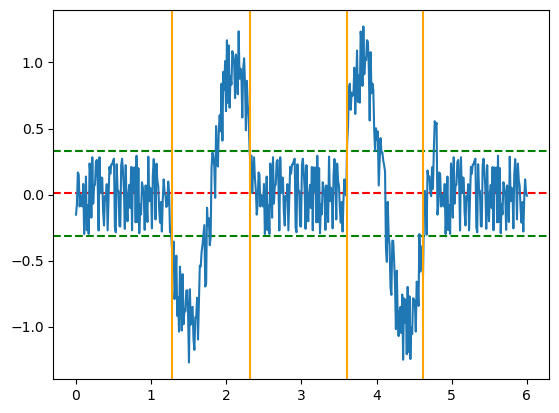

In [5]:
import numpy as np
from matplotlib import pyplot as plt

# 定義產生噪音數據的函數
def function(x, noise):
    y = np.sin(7*x + 2) + noise
    return y

def function2(x, noise):
    y = np.sin(6*x + 2) + noise
    return y

# 產生隨機噪音數據
noise = np.random.uniform(low=-0.3, high=0.3, size=(100,))

# 產生 x 軸數據
x_line0 = np.linspace(1.95, 2.85, 100)
y_line0 = function(x_line0, noise)
x_line = np.linspace(0, 1.95, 100)
x_line2 = np.linspace(2.85, 3.95, 100)
x_pik = np.linspace(3.95, 5, 100)
y_pik = function2(x_pik, noise)
x_line3 = np.linspace(5, 6, 100)

# 合併噪音數據
x = np.linspace(0, 6, 500)
y = np.concatenate((noise, y_line0, noise, y_pik, noise), axis=0)

# 繪製數據
noise_band = 1.1
top_noise = y.mean() + noise_band * np.amax(noise)
bottom_noise = y.mean() - noise_band * np.amax(noise)
fig, ax = plt.subplots()
ax.axhline(y=y.mean(), color='red', linestyle='--')  # 繪製平均值的水平線
ax.axhline(y=top_noise, linestyle='--', color='green')  # 繪製噪音上限的水平線
ax.axhline(y=bottom_noise, linestyle='--', color='green')  # 繪製噪音下限的水平線
ax.plot(x, y)  # 繪製數據曲線

# 定義分割數據的函數
def split(arr, cond):
    return [arr[cond], arr[~cond]]

# 找到低於噪音下限的數據索引
botom_data_indexes = np.argwhere(y < bottom_noise)
# 根據 x 軸值分割數據
splitted_bottom_data = split(botom_data_indexes, botom_data_indexes < np.argmax(x > 3))

# 找到高於噪音上限的數據索引
top_data_indexes = np.argwhere(y > top_noise)
# 根據 x 軸值分割數據
splitted_top_data = split(top_data_indexes, top_data_indexes < np.argmax(x > 3))

# 獲取第一個信號範圍
first_signal_start = np.amin(splitted_bottom_data[0])
first_signal_end = np.amax(splitted_top_data[0])

# 獲取第一個信號的 x 軸索引
x_first_signal = np.take(x, [first_signal_start, first_signal_end])
ax.axvline(x=x_first_signal[0], color='orange')  # 繪製第一個信號起點的垂直線
ax.axvline(x=x_first_signal[1], color='orange')  # 繪製第一個信號終點的垂直線

# 獲取第二個信號範圍
second_signal_start = np.amin(splitted_top_data[1])
second_signal_end = np.amax(splitted_bottom_data[1])

# 獲取第二個信號的 x 軸索引
x_second_signal = np.take(x, [second_signal_start, second_signal_end])
ax.axvline(x=x_second_signal[0], color='orange')  # 繪製第二個信號起點的垂直線
ax.axvline(x=x_second_signal[1], color='orange')  # 繪製第二個信號終點的垂直線

plt.show()  # 顯示圖表


### 2-2 matplotlib 基本繪圖

如果單純是要在同一個圖版上繪製多個圖形 (共用座標軸)，簡單使用 matplotlib 的 plot 函數即可

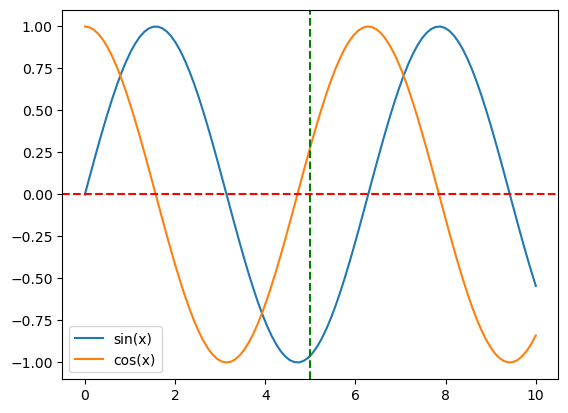

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label='sin(x)')  # 繪製第一條曲線
plt.plot(x, y2, label='cos(x)')  # 繪製第二條曲線
plt.axhline(y=0, color='r', linestyle='--')  # 添加水平線
plt.axvline(x=5, color='g', linestyle='--')  # 添加垂直線
plt.legend()
plt.show()


### 2-3 subplot() 函數

但是如果是要繪製多個不同座標軸的圖表在同一個圖版上，就必須用到 subplot() 函式。這個函式能夠讓我們先排版多個圖表的位置，接著再一一設定圖表內容。

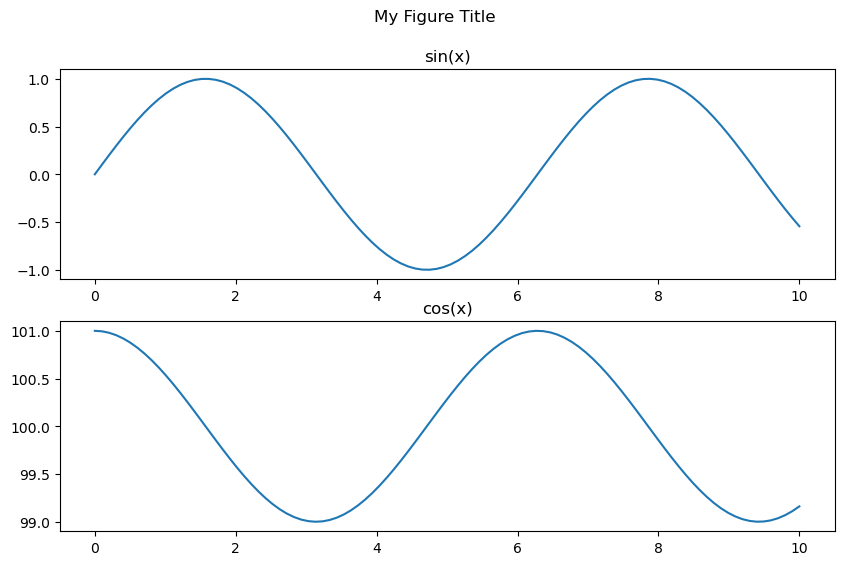

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x) + 100

fig, (ax1, ax2) = plt.subplots(2, 1)  # 創建兩個子圖，垂直排列
fig.set_size_inches(10, 6)  # 設置圖形大小
fig.suptitle('My Figure Title')  # 設置圖形標題

ax1.plot(x, y1)  # 在第一個子圖上繪製 sin(x)
ax1.set_title('sin(x)')  # 設置第一個子圖的標題

ax2.plot(x, y2)  # 在第二個子圖上繪製 cos(x)
ax2.set_title('cos(x)')  # 設置第二個子圖的標題

# fig.tight_layout()  # 自動調整子圖間距，並保留標題空間
# fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)  # 手動調整子圖之間的間距

# fig.savefig('my_figure.png')  # 將圖形保存為 PNG 文件

plt.show()  # 顯示圖表


#### Ps. 圖版排版的方法

注意以下 `fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)` 中 ax1 ~ ax4 分別對應到那一張圖？

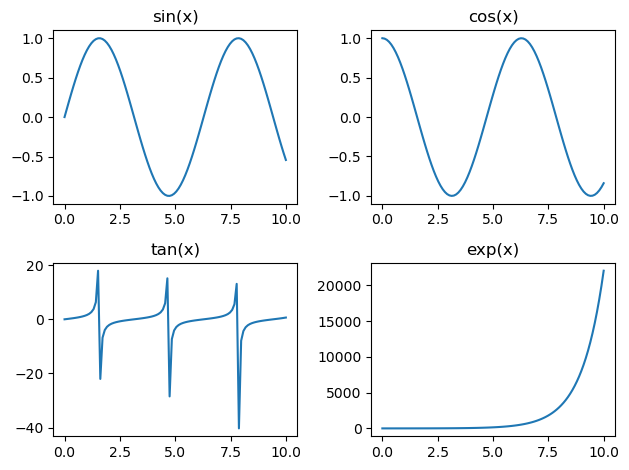

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.exp(x)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)  # 創建 2x2 的子圖佈局

ax1.plot(x, y1)  # 在 ax1 上繪製 sin(x)
ax1.set_title('sin(x)')

ax2.plot(x, y2)  # 在 ax2 上繪製 cos(x)
ax2.set_title('cos(x)')

ax3.plot(x, y3)  # 在 ax3 上繪製 tan(x)
ax3.set_title('tan(x)')

ax4.plot(x, y4)  # 在 ax4 上繪製 exp(x)
ax4.set_title('exp(x)')

plt.tight_layout()  # 自動調整子圖間距
plt.show()  # 顯示圖表


### 2-4 關於數字「出現次數」的計算

會應用到這個方法是在我思考要如何找出 raw data 中，代表背景噪音的 baseline 位置想到的。我認為如果是 baseline 的位置，應該是「眾數 (mode)」所在之處吧。至於這個背景噪音的振幅，我覺得或許可以用「重複次數排名前幾%」與眾數之間的距離決定。

雖然最後我沒有把這個方法在主程式用上，不過那是因為我認為這個方法可能會花很多的運算資源，為了簡化程式才不用的🤓

In [ ]:
from collections import Counter

# 假設我們有一個列表
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

# 計算每個數字出現的次數
counter = Counter(data)
print(counter)

# 根據出現次數排序
sorted_counts = counter.most_common()
print(sorted_counts)

# 計算前 25% 的數字
top_25_percent_index = int(len(sorted_counts) * 0.25)
print(top_25_percent_index)

# 取得前 25% 的數字
top_25_percent_numbers = [num for num, count in sorted_counts[:top_25_percent_index]]

print(top_25_percent_numbers)


Counter({5: 5, 4: 4, 3: 3, 2: 2, 1: 1})
[(5, 5), (4, 4), (3, 3), (2, 2), (1, 1)]
1
[5]


In [ ]:
# 引入套件
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取檔案
data = pd.read_csv("20240612_132_20.01k_19.05k_388ns_20us_100shot_F_MCP2.1kV_scal-1000mV_R250-250ohm_4GS_MAX2611_1.data", sep=' ', header=None)

# 指定 column names
data.columns = ['micro_sec', 'mini_volts']

# 顯示前、末 5 筆資料
print(data.head())
print(data.tail())

In [ ]:
from collections import Counter

# 計算每個數字出現的次數
counted_data = Counter(data['mini_volts'])

# 根據出現次數排序
counted_data = counted_data.most_common()
print(counted_data)

# 設定排除雜訊 (視為訊號) 的範圍；
# 例如，若 signal_rarity = 0.25，則出現頻率低於 25% 的數字將被視為訊號
signal_rarity = 0.6

# 計算分界點索引值
threshold_index = int(len(counted_data) * (1 - signal_rarity))
print(len(counted_data))
print(threshold_index)

# 取得雜訊
noise = [num for num, count in counted_data[:threshold_index]]
print(noise)

# 取得雜訊中的最大值以及最小值
max_noise = max(noise)
min_noise = min(noise)

print(max_noise, min_noise)

# # 取得訊號在 data 中的索引值
# signal_index = data['mini_volts'].apply(lambda x: True if x > max_noise else False)

# # 取得訊號
# signal = [num for num, count in counted_data[threshold_index:]]

[(0.0015625, 173842), (-0.00234375, 124932), (0.00546875, 63295), (-0.00625, 29682), (0.009375, 5695), (-0.0101562, 2299), (0.0132813, 172), (-0.0140625, 69), (0.0171875, 2), (0.0210938, 2), (0.0289063, 2), (-0.0179687, 2), (0.0757813, 1), (0.216406, 1), (0.204688, 1), (0.11875, 1), (0.025, 1), (0.0367188, 1)]
18
7
[0.0015625, -0.00234375, 0.00546875, -0.00625, 0.009375, -0.0101562, 0.0132813]
0.0132813 -0.0101562


### 2-5 查看 y 軸 (intensity / mV) 的分佈

我會覺得運用眾數的方法可行是因為我先查看了訊號強度的分佈，發現雜訊是主要收集到訊號的位置，真實訊號的比例似乎都蠻罕見的。

以下用了兩種方法來畫出次數分佈，上圖是用 matplotlib，下圖用 seaborn

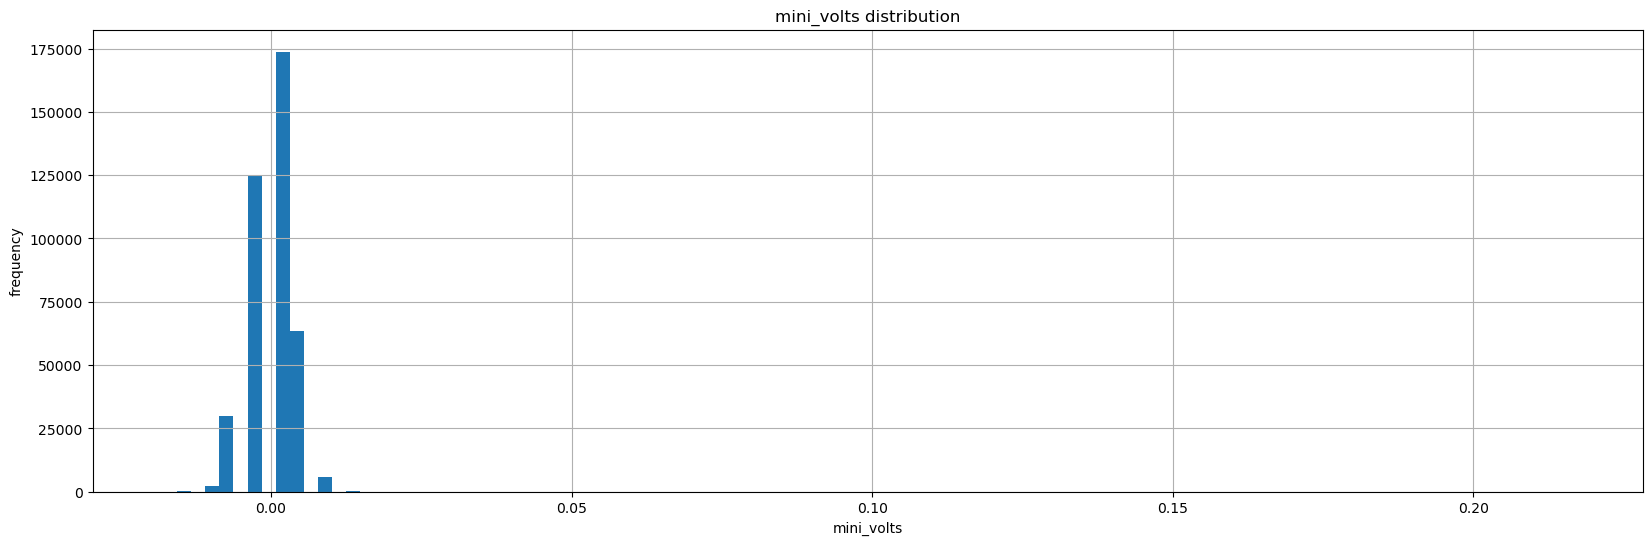

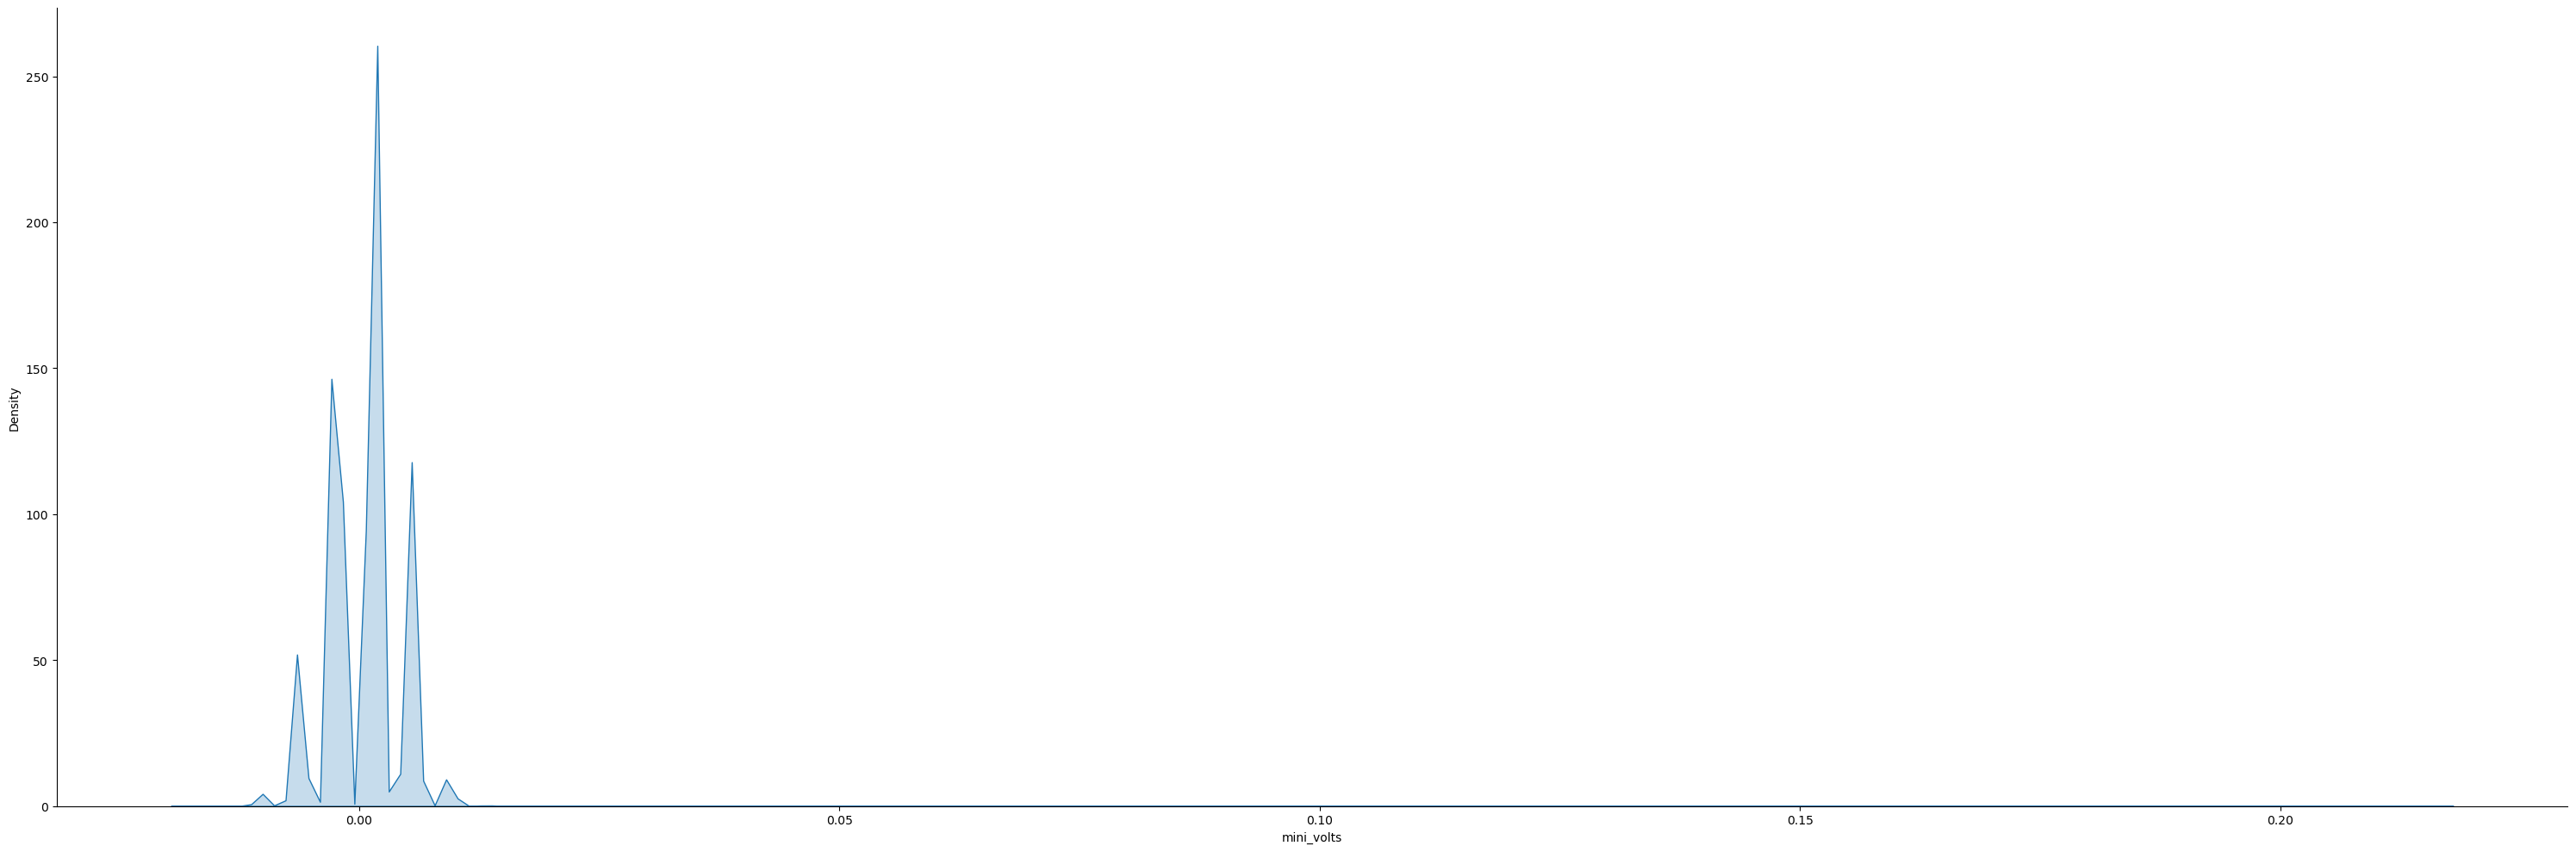

In [ ]:
# 畫出 mini_volts 的 次數分佈
plt.figure(figsize=(20, 6))
plt.hist(data['mini_volts'], bins=100)
plt.title("mini_volts distribution")
plt.xlabel("mini_volts")
plt.ylabel("frequency")
plt.style.use("default")
plt.grid(True)
plt.show()

# 畫出 mini_volts 的 次數分佈
sns.displot(data['mini_volts'], kind='kde', bw_adjust=2, height=10, aspect=3, fill=True)


### 2-6 關於「滑桿」的設計

這也是一個有趣的部分。

我需要滑桿來控制諸如縮放、時間位置等參數。一開始我使用的是 ipywidgets 的方法。這個方法在 IPython 環境 (jupyter notebook) 可以執行，但是當我把程式碼變成 Python 腳本之後卻不能執行了！其實也合理，套件名字都說是 "ipy-" 了。

為此我必須另尋他法 (苦笑)，後來發現 matplotlib 本身就有提供設計 GUI 的指令集，真是太好了。

In [7]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import ipywidgets as widgets
from IPython.display import display

# 讀取檔案
data = pd.read_csv("20240612_132_20.01k_19.05k_388ns_20us_100shot_F_MCP2.1kV_scal-1000mV_R250-250ohm_4GS_MAX2611_1.data", sep=' ', header=None)

# 指定 column names
data.columns = ['micro_sec', 'mini_volts']

# 顯示前、末 5 筆資料
print(data.head())
print(data.tail())
# %%

# 計算每個數字出現的次數
counted_data = Counter(data['mini_volts'])

# 根據出現次數排序
counted_data = counted_data.most_common()
print(counted_data)

# 設定排除雜訊 (視為訊號) 的範圍；
# 例如，若 signal_rarity = 0.25，則出現頻率低於 25% 的數字將被視為訊號
signal_rarity = 0.6

# 計算分界點索引值
threshold_index = int(len(counted_data) * (1 - signal_rarity))
print(len(counted_data))
print(threshold_index)

# 取得雜訊
noise = [num for num, count in counted_data[:threshold_index]]
print(noise)

# 取得雜訊中的最大值以及最小值
max_noise = max(noise)
min_noise = min(noise)

print(max_noise, min_noise)

# # 取得訊號在 data 中的索引值
# signal_index = data['mini_volts'].apply(lambda x: True if x > max_noise else False)

# # 取得訊號
# signal = [num for num, count in counted_data[threshold_index:]]

# 創建滑桿
x_slider = widgets.FloatRangeSlider(
    value=[data['micro_sec'].min(), data['micro_sec'].max()],
    min=data['micro_sec'].min(),
    max=data['micro_sec'].max(),
    step=0.001,
    description='time Range:',
    continuous_update=True, 
    layout=widgets.Layout(width='1200px')  # 設置滑桿的寬度
)

# 更新圖表的函數
def update_plot(time_range):
    plt.figure(figsize=(20, 6))
    plt.plot(data['micro_sec'], data['mini_volts'])

    # 標記超出閾值的訊號區間
    # 對於每個時間點，
    for i, time in enumerate(data['micro_sec']):

        # 檢查 i 是否是最後一個索引，避免 IndexError
        if i < len(data['micro_sec']) - 1:

            # 如果當前時間點的 mini_volts 未超出 max_noise，且下一個時間點的 mini_volts 超出 max_noise，則在圖中畫一條橘色垂直虛線
            if data['mini_volts'].iloc[i] < max_noise and data['mini_volts'].iloc[i + 1] > max_noise:
                plt.axvline(x=time-0.05, color='orange', linestyle='dotted')
            
            # 如果當前時間點的 mini_volts 超出 max_noise，且下一個時間點的 mini_volts 低於 min_noise，則在圖中畫一條橘色垂直虛線
            elif data['mini_volts'].iloc[i] > max_noise and data['mini_volts'].iloc[i + 1] < min_noise:
                plt.axvline(x=time+0.05, color='orange', linestyle='dotted')

    plt.axhline(y=data['mini_volts'].mode().iloc[0], color='red', linestyle='--')
    plt.axhline(y=max_noise, color='green', linestyle='--')
    plt.axhline(y=min_noise, color='green', linestyle='--')

    plt.xlim(time_range)

    plt.title("raw data of MS")
    plt.xlabel("µs")
    plt.ylabel("mV")
    plt.style.use("default")
    # plt.grid(True)

    plt.show()

# 綁定滑桿和更新函數
interactive_plot = widgets.interactive(update_plot, time_range=x_slider)

# 顯示滑桿和圖表
display(interactive_plot)

   micro_sec  mini_volts
0    0.00000   -0.002344
1    0.00025   -0.002344
2    0.00050    0.005469
3    0.00075   -0.002344
4    0.00100    0.001563
        micro_sec  mini_volts
399995    99.9988   -0.002344
399996    99.9990   -0.002344
399997    99.9993   -0.002344
399998    99.9995   -0.002344
399999    99.9998   -0.002344
[(0.0015625, 173842), (-0.00234375, 124932), (0.00546875, 63295), (-0.00625, 29682), (0.009375, 5695), (-0.0101562, 2299), (0.0132813, 172), (-0.0140625, 69), (0.0171875, 2), (0.0210938, 2), (0.0289063, 2), (-0.0179687, 2), (0.0757813, 1), (0.216406, 1), (0.204688, 1), (0.11875, 1), (0.025, 1), (0.0367188, 1)]
18
7
[0.0015625, -0.00234375, 0.00546875, -0.00625, 0.009375, -0.0101562, 0.0132813]
0.0132813 -0.0101562


interactive(children=(FloatRangeSlider(value=(0.0, 99.9998), description='time Range:', layout=Layout(width='1…

### 2-7 有關 "annotate" 按鈕的循環

就像前面所說的，設計這個按鈕的循環功能時曾令我非常頭痛；所幸最後有找出一個可行的方法。

“annotate” 按鈕的功能是通過一個循環來實現的：按一下按鈕會繪製註解，再按一下會移除註解，然後再按一下會重新繪製註解。這是通過檢查和管理 annotations 列表來實現的。每次按下按鈕時，會檢查 annotations 列表是否為空，如果不為空則移除所有註解，否則添加新的註解。這樣就實現了作圖及取消的循環。以下是簡化的範例：

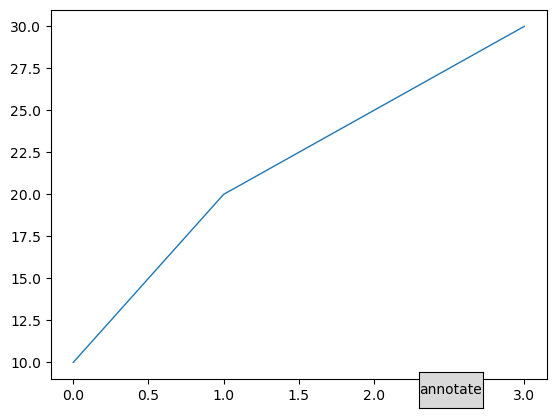

In [1]:
! python button_function_simple_example.py